In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def midpoint_method(x_0, N, T, f, params, k = 1):

    Del = T / N
    A = [x_0.copy()]
    
    t = 0

    for i in range(N * k):
        
        k_t = x_0 + Del / 2 * f(t, x_0, params)
        x_0 += Del * f(t + Del / 2, k_t, params)
        A.append(x_0.copy())
        
        t += Del

    return A

In [3]:
def mathieu_equation(t, x, params):
    
    a,b = params[0],params[1]
    
    A_t = np.array([np.array([0, -(a + b * np.cos(t))]),
                    np.array([1, 0])])
    
    return np.array(A_t @ x)
    

In [4]:
def calc_monodromy(a,b,f):

    x_0 = np.identity(2)
    T = 2 * np.pi
    N = 100
    params = [a,b]
    
    A = midpoint_method(x_0, N, T, f, params)
    
    x_T = A[-1]
    
    return(x_T)
    

In [5]:
print(calc_monodromy(0.1,0.1,mathieu_equation))

[[-0.48008265 -0.20090595]
 [ 3.83026884 -0.48008826]]


In [6]:
A = {}

for a in range(161):
    for b in range(-40,41):
        
        M = calc_monodromy(a / 20,b / 20, mathieu_equation)
        A["a:"+str(a)+"b:"+str(b)] = M
        
        eigvalues = np.linalg.eig(M)[0]
        A["min:a:"+str(a)+"b:"+str(b)] = min(eigvalues)
        A["max:a:"+str(a)+"b:"+str(b)] = max(eigvalues)
        
        

In [7]:
A_graphing = []

for a in range(161):
    row = []
    for b in range(-40,41):
        if np.real(A["max:a:"+str(a)+"b:"+str(b)]) > 1: row.append(1)
        elif np.real(A["min:a:"+str(a)+"b:"+str(b)]) < -1: row.append(1)
        else: row.append(0)
            
    A_graphing.append(row)
    

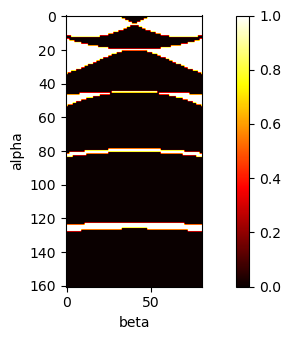

In [8]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data2D = A_graphing
im = plt.imshow(data2D, cmap="hot")
plt.colorbar()
plt.xlabel("beta")
plt.ylabel("alpha")
plt.show()

In [9]:
A_graphing = []

for a in range(161):
    row = []
    for b in range(-40,41):
        row.append(np.linalg.det(A["a:"+str(a)+"b:"+str(b)]))
            
    A_graphing.append(row)
    

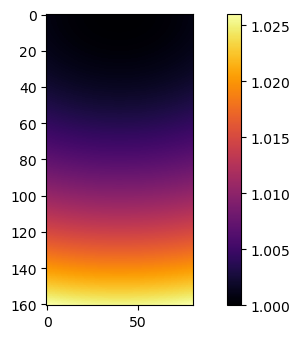

In [10]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
data2D = A_graphing
im = plt.imshow(data2D, cmap="inferno")
plt.colorbar(im)
plt.show()

In [11]:
A_graphing = []

for a in range(161):
    row = []
    for b in range(-40,41):
        row.append(np.linalg.det(A["a:"+str(a)+"b:"+str(b)]))
            
    A_graphing.append(row)
    

In [12]:
b = 2

real_max = []
im_max = []

real_min = []
im_min = []

for a in range(161):
    
    real_max.append(np.real(A["max:a:"+str(a)+"b:"+str(b)]))
    im_max.append(np.imag(A["max:a:"+str(a)+"b:"+str(b)]))
    
    real_min.append(np.real(A["min:a:"+str(a)+"b:"+str(b)]))
    im_min.append(np.imag(A["min:a:"+str(a)+"b:"+str(b)]))

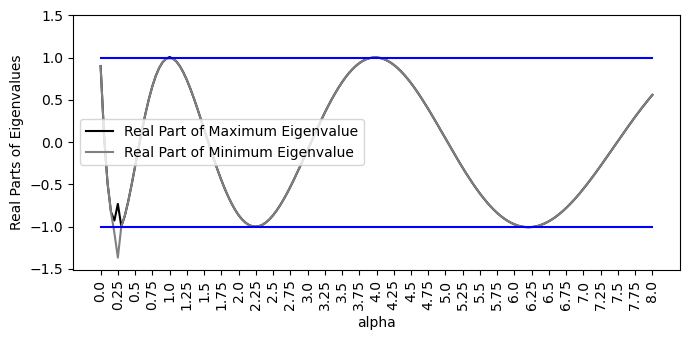

In [13]:
plt.plot(np.array(real_max), label="Real Part of Maximum Eigenvalue", color = "black", marker = "")
plt.plot(np.array(real_min), label="Real Part of Minimum Eigenvalue", color = "gray", marker = "")

plt.plot([1 for i in range(161)], color = "blue")
plt.plot([-1 for i in range(161)], color = "blue")
plt.xticks([i for i in range(0,161,5)], [i / 20 for i in range(0,161,5)], rotation='vertical')
plt.xlabel('alpha')
plt.ylabel('Real Parts of Eigenvalues')
plt.ylim([min(im_min)-0.5,max(im_max)+0.5])
plt.legend()
plt.show()

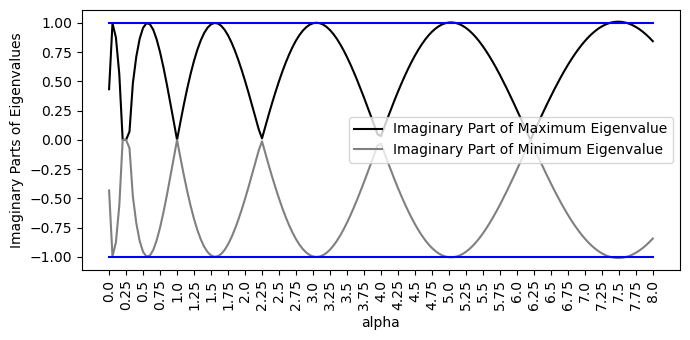

In [14]:
plt.plot(np.array(im_max), label="Imaginary Part of Maximum Eigenvalue", color = "black", marker = "")
plt.plot(np.array(im_min), label="Imaginary Part of Minimum Eigenvalue", color = "gray", marker = "")
plt.plot([1 for i in range(161)], color = "blue")
plt.plot([-1 for i in range(161)], color = "blue")
plt.xticks([i for i in range(0,161,5)], [i / 20 for i in range(0,161,5)], rotation='vertical')
plt.xlabel('alpha')
plt.ylabel('Imaginary Parts of Eigenvalues')
plt.ylim([min(im_min)-0.1,max(im_max)+0.1])
plt.legend()
plt.show()

In [15]:
print(np.array(real_max)[20])
print(np.array(real_min)[20])
print(np.array(real_max)[20] * np.array(real_min)[20])
print(np.array(im_max)[20])
print(np.array(im_min)[20])

1.0080214334534685
0.9924309397790466
1.0003916585196475
0.0
0.0


In [16]:
a = 20
b = 2

M = A["a:"+str(a)+"b:"+str(b)]

In [17]:
print(np.linalg.eig(M))
v2 = np.linalg.eig(M)
v2 = v2[1][1]
print(v2)

(array([1.00802143, 0.99243094]), array([[ 0.7760118 , -0.77597873],
       [ 0.63071839,  0.63075908]]))
[0.63071839 0.63075908]


In [18]:
x_0 = v2.transpose()

A2 = midpoint_method(x_0, 100, 2 * np.pi, mathieu_equation, [1, 0.7], k=10)

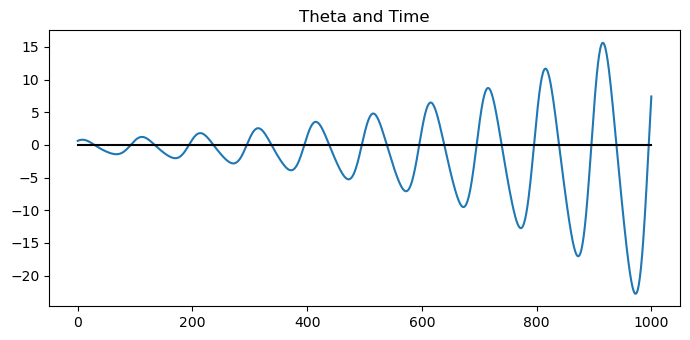

In [19]:
theta_path = []
for i in range(len(A2)):
    theta_path.append(A2[i][1])

plt.plot(theta_path)
plt.plot([0 for i in range(len(theta_path))], color = "black")
plt.title("Theta and Time")
plt.show()

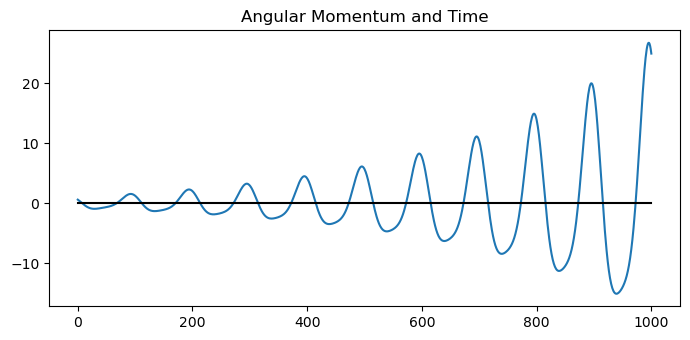

In [20]:
om_path = []
for i in range(len(A2)):
    om_path.append(A2[i][0])

plt.plot(om_path)
plt.plot([0 for i in range(len(om_path))], color = "black")
plt.title("Angular Momentum and Time")
plt.show()

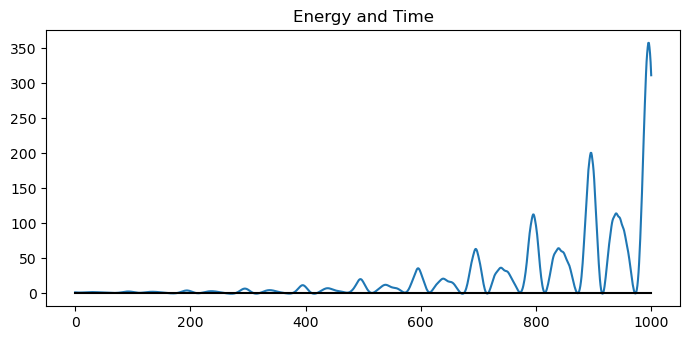

In [21]:
E = 1/2 * np.array(om_path) ** 2 + np.cos(np.array(theta_path))

plt.plot(E)
plt.plot([0 for i in range(len(E))], color="black")
plt.title("Energy and Time")
plt.show()

In [22]:
print(A2[0])

[0.63071839 0.63075908]


In [23]:
print(A2[1])

[0.56124203 0.66827167]


In [24]:
def pendulum_periodic_forcing(t, x, params):
    
    l0, freq, ep = params[0], params[1], params[2]
    
    th = x[0]
    om = x[1]
    
    ret = [0,0]
    
    lt = l0 * (1 + ep * np.cos(freq * t))
    
    ret[0] = om
    ret[1] = (-9.8 / lt) * np.sin(th)
    
    return np.array(ret)

In [25]:
x_0 = np.array([0.1,0.0])

l0 = 1
freq = np.sqrt(9.8 / l0)
ep = 0.1


A3 = midpoint_method(x_0, 100, 2 * np.pi / freq, pendulum_periodic_forcing, [l0, freq, ep], k=10)

Text(0, 0.5, 'Angular Momentum')

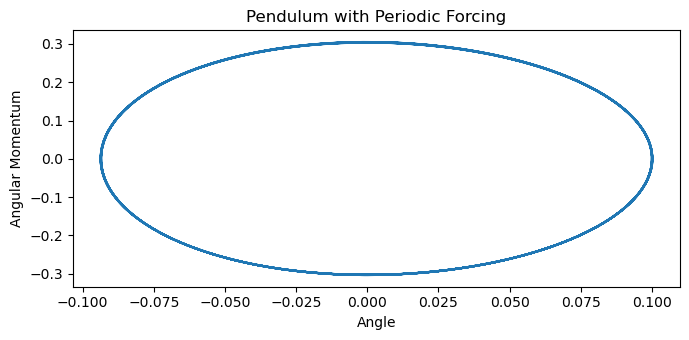

In [26]:
df = pd.DataFrame(A3)

df.columns = ['th','Om']

plt.plot(df['th'],df['Om'])
plt.title('Pendulum with Periodic Forcing')
plt.xlabel('Angle')
plt.ylabel('Angular Momentum')

In [27]:
x_0 = np.array([0.1,0.0])

l0 = 1
freq = np.sqrt(9.8 / l0) * 0.25
ep = 0.1


A3 = midpoint_method(x_0, 1000, 2 * np.pi / freq, pendulum_periodic_forcing, [l0, freq, ep], k=100)

Text(0, 0.5, 'Angular Momentum')

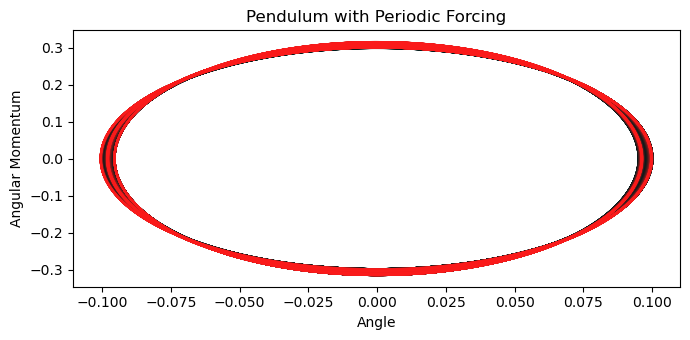

In [28]:
df = pd.DataFrame(A3)

df.columns = ['th','Om']

fig = plt.figure()
ax = fig.add_subplot(111)

for j in range(100):
    ax.plot(df['th'][j*1000:(j+1)*1000], df['Om'][j*1000:(j+1)*1000], color = (((0.01 * j) ** 2), 0.1, 0.1))
    
ax.set_title('Pendulum with Periodic Forcing')
ax.set_xlabel('Angle')
ax.set_ylabel('Angular Momentum')

In [29]:
x_0 = np.array([1.0,-1.0])

l0 = 1
freq = np.sqrt(9.8 / l0) / 2
ep = 0.6


A3 = midpoint_method(x_0, 1000, 2 * np.pi / freq, pendulum_periodic_forcing, [l0, freq, ep], k=40)

Text(0, 0.5, 'Angular Momentum')

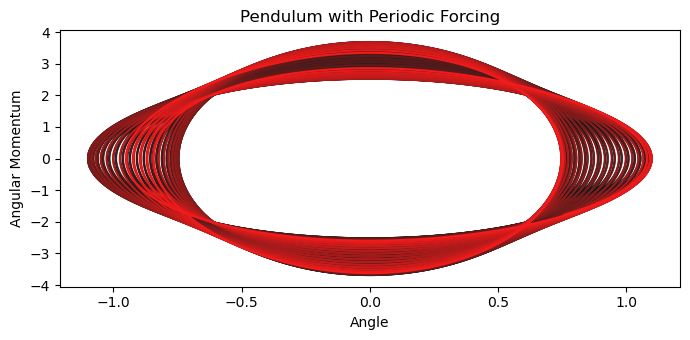

In [30]:
df = pd.DataFrame(A3)

df.columns = ['th','Om']

fig = plt.figure()
ax = fig.add_subplot(111)

for j in range(40):
    ax.plot(df['th'][j*1000:(j+1)*1000], df['Om'][j*1000:(j+1)*1000], color = (((j / 40) ** 2), 0.1, 0.1))
    
ax.set_title('Pendulum with Periodic Forcing')
ax.set_xlabel('Angle')
ax.set_ylabel('Angular Momentum')

Text(0.5, 1.0, 'Angle with respect to Time')

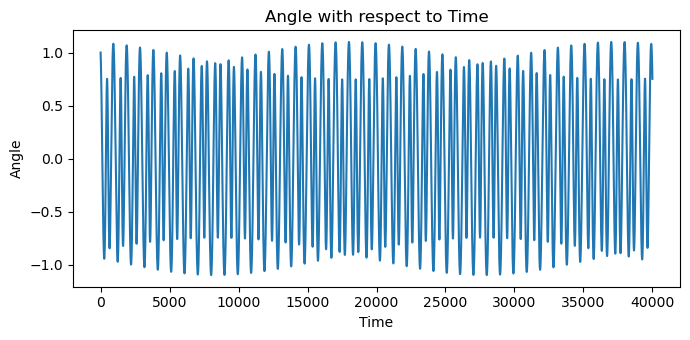

In [31]:
plt.plot(df['th'])
plt.xlabel("Time")
plt.ylabel("Angle")
plt.title("Angle with respect to Time")

Text(0.5, 1.0, 'Angular Momentum with respect to Time')

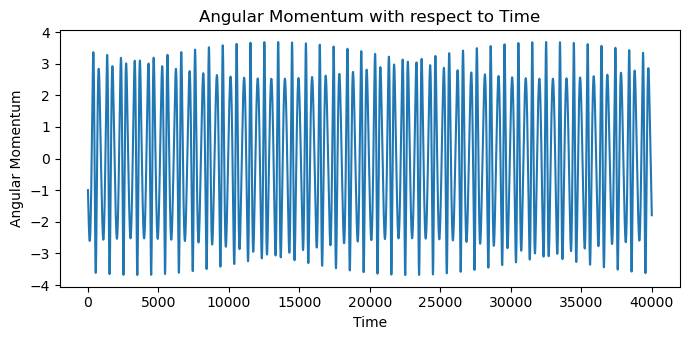

In [32]:
plt.plot(df['Om'])
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.title("Angular Momentum with respect to Time")

Text(0.5, 1.0, 'Energy with respect to Time')

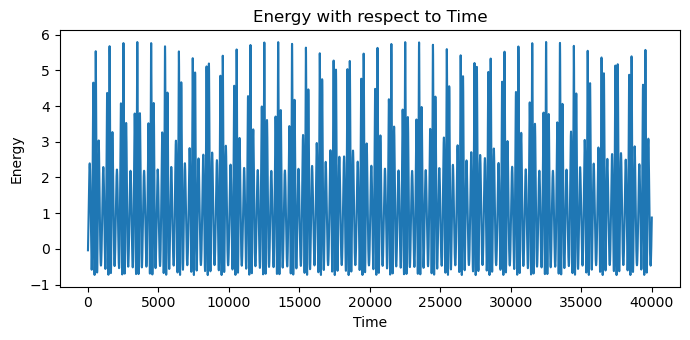

In [33]:
df['E'] = 1/2 * df['Om'] ** 2 - np.cos(df['th'])
plt.plot(df['E'])
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy with respect to Time")